# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv("data/data-cleaned.csv", sep=",", index_col="ID", parse_dates=True)

In [4]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,8,10,4,7,0,0,0,0,0,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,1,2,5,0,0,0,0,0,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,8,2,10,4,0,0,0,0,0,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,2,0,4,6,0,0,0,0,0,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,3,6,5,0,0,0,0,0,0


# Création de variables

**Tableau.** Variables ajoutées

| :--- | :--- |
| **NbAcceptedCampaigns** | Nombre de campagnes marketing acceptées (hors variable cible) |
| **HasAcceptedCampaigns** | Le client a déjà accepté une campagne (1) ou non (0) |
| **NbChildren** | Nombre d'enfants au total (bas âge + adolescent) |

In [5]:
# todo : faire une var somme des achats sur le web
# todo : faire un client type par type d'achat (web / magasin) => est-ce que les gens qui achètent en web / magasin sont différents ?
# todo : créer une variable duréeClient qui dit depuis quand le client est inscrit

In [6]:
# todo: commenter la démarche

In [7]:
df["NbAcceptedCampaigns"] = 0

for i in range(1, 6):
    df["NbAcceptedCampaigns"] += df[f"AcceptedCmp{i}"].astype(int)

<Axes: xlabel='NbAcceptedCampaigns', ylabel='Count'>

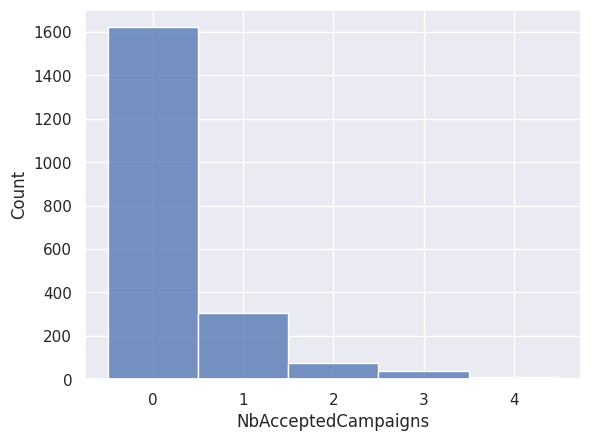

In [8]:
sns.histplot(df["NbAcceptedCampaigns"], discrete=True)

In [9]:
df["HasAcceptedCampaigns"] = df["NbAcceptedCampaigns"] > 0

<Axes: xlabel='HasAcceptedCampaigns', ylabel='Count'>

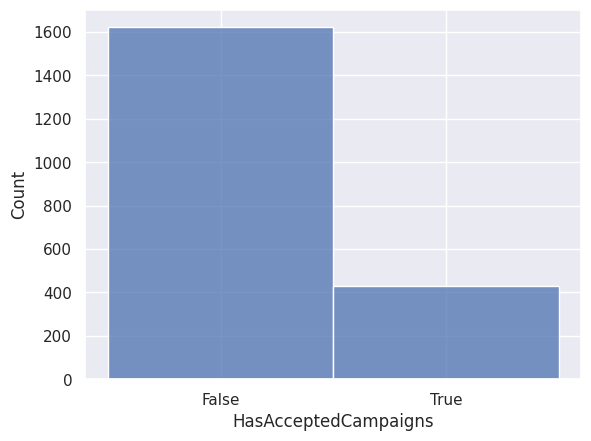

In [10]:
sns.histplot(df["HasAcceptedCampaigns"].astype(str))

In [11]:
df_clients = df[df["HasAcceptedCampaigns"]]
df_not_clients = df[~df["HasAcceptedCampaigns"]]

In [12]:
# todo: vérifier si par exemple Kids et Teen apportent des informations différentes => si les deux sont complémentaires, on les laisse / sinon on les supprime au profit de notre nouvelle variable

<Axes: xlabel='Kidhome,Teenhome'>

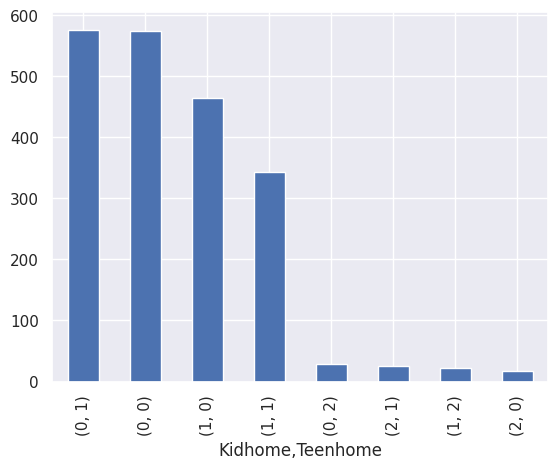

In [13]:
df[["Kidhome", "Teenhome"]].value_counts().plot(kind="bar")

In [14]:
df["NbChildren"] = df["Kidhome"].astype(int) + df["Teenhome"].astype(int)

<Axes: xlabel='NbChildren', ylabel='Count'>

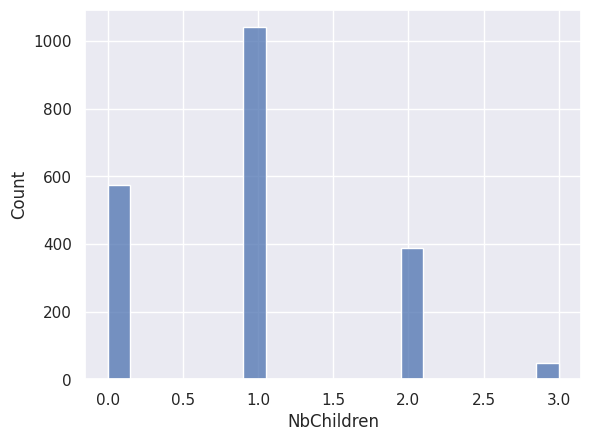

In [15]:
sns.histplot(df["NbChildren"])

In [16]:
# todo: créer une variable "NbAcceptedCampaignsWithResponse", qui contient donc la 6ème campagne marketing => l'objectif est de clusteriser les gens en fonction de "à quel point ils sont marketables" => c'est-à-dire, on présente nos résultats en disant sur qui il vaut mieux se concentrer pour faire des pubs

In [17]:
# todo: créer une variable "RevenuePerClient" => le revenu rapporté par chaque client => ce serait plutôt juste une variable type "KPI" à afficher dans un dashboard non ?

In [18]:
# todo: de même, créer une variable "RevenueWinePerClient" => le revenu de vin pour chaque client, et faire de même pour chaque produit => par la suite on pourra faire des représentations "quel client rapporte le plus de vin"

# Sauvegarde du Dataframe

In [19]:
df.to_csv("data/data-cleaned-feature-engineering.csv")